# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [80]:
import seaborn as sb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
    
sb.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [81]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [83]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [84]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [85]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [86]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [87]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [88]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [89]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [90]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [91]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [92]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [93]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [94]:
data.duplicated().sum()

71

In [95]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [96]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [97]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [98]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [99]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [100]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Text(0, 0.5, 'Вероятность возвратить долг')

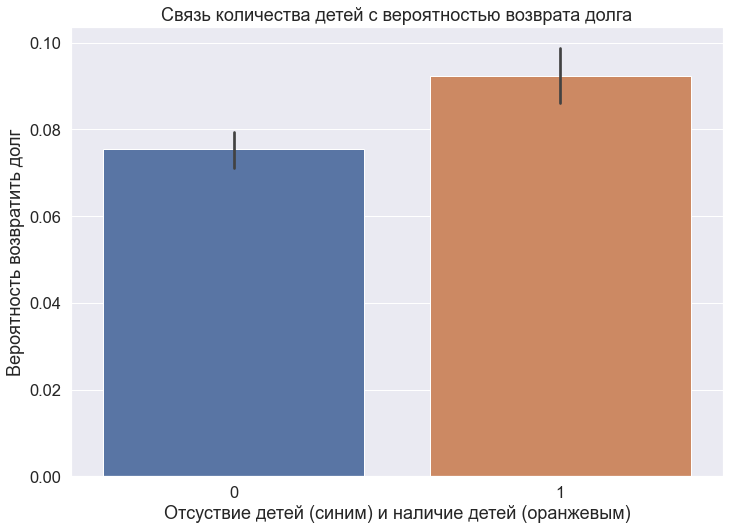

In [101]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
def childlover(row):
    if row > 0:
        return 1
    else:
        return 0
data['children_id'] = data['children'].apply(childlover)

data['debt'].corr(data['children_id'])
fig1 = sb.barplot(x=(data['children_id']), y=(data['debt']))
fig1.set_title('Связь количества детей с вероятностью возврата долга')
fig1.set_xlabel('Отсуствие детей (синим) и наличие детей (оранжевым)')
fig1.set_ylabel('Вероятность возвратить долг')

<div class="alert alert-info"> 
    **Вывод:** слабая корреляция отражается при анализе по Пирсону. Столбчатая диаграмма также отражает бóльшую вероятность не вернуть долг у счастливых родителей, чем у грутных и безлужаечных. 
</div>

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
1. Все библиотеки лучше импортировать в начале файла. Об этом говорится в [стилевом гайде по питону](https://www.python.org/dev/peps/pep-0008/#imports)
    
        Imports are always put at the top of the file, just after any module comments and docstrings, and before module globals and constants.
    
1. Добавь, пожалуйста, на все графики названия, подписи осей и легенду ((если рассматриваешь несколько наборов данных). Можешь посмотреть [тут](https://matplotlib.org/stable/tutorials/introductory/usage.html), как их добавлять
1. Не нужно считать корреляцию для категориальных признаков. Кстати, ты забыл вывести ее на экран, можешь использовать для этого фунцию print или display
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Здорово, что посмотрел на вероятность задолженности в группах, но стоило еще взглянуть на их размер. Для маленьких групп результаты анализа могут быть не репрезентативны
</div>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Text(0, 0.5, 'Семейный статус')

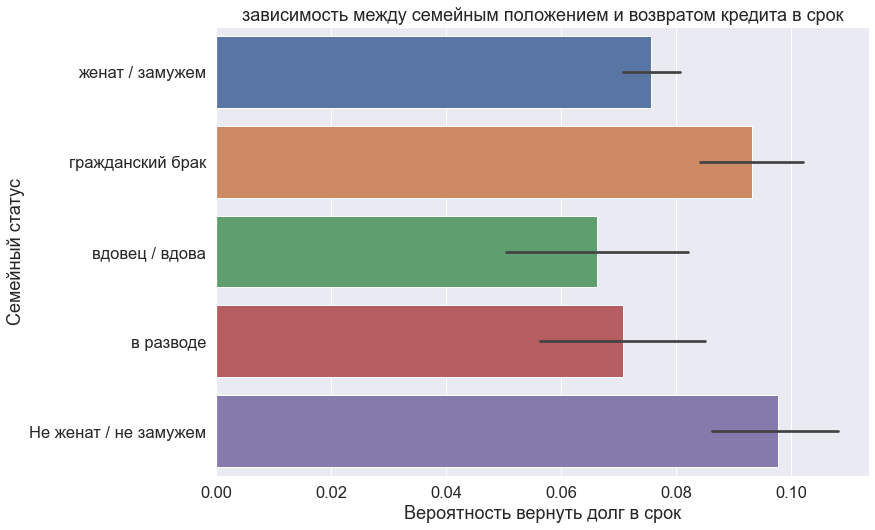

In [102]:
fig2 = sb.barplot(x=(data['debt']), y=(data['family_status']))
fig2.set_title('зависимость между семейным положением и возвратом кредита в срок')
fig2.set_xlabel('Вероятность вернуть долг в срок')
fig2.set_ylabel('Семейный статус')
#sb.barplot(x=(data['family_status_id']), y=(data['debt']))
# Ваш код будет здесь. Вы можете создавать новые ячейки.

<div class="alert alert-info">
**Вывод:** Наиболее надежными заемщиками при ближайшем рассмотрелии кажутся вдовцы. За ними с небольшим отрывом следуют разведенные и женатые. Гражданский брак и холостяцкий образ жизни являются факторами риска. 
</div>

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Давай увеличим график или повернем подписи оси Х на 90 градусов, потому что сейчас их сложно прочитать
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Отлично! Теперь с подписями все замечательно
</div>

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64

total_income_category
A    1223042.0
B     257558.0
C     130355.0
D      43929.0
E      26431.0
Name: total_income, dtype: float64

<AxesSubplot:xlabel='mean_income_in_category', ylabel='debt'>

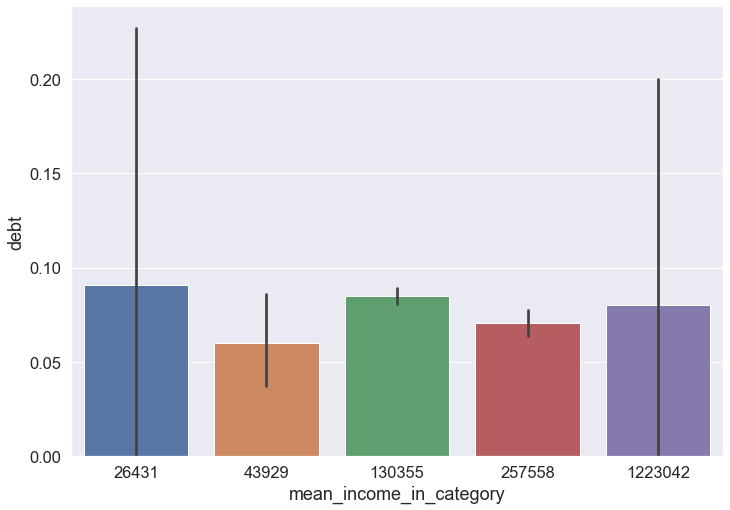

In [103]:
#data1 = data.groupby('debt')['total_income']
data2 = data.groupby('total_income_category')['debt'].count() #размеры каждой из групп
display(data2)

median_grouped = data.groupby('total_income_category')['total_income'].median()
display(median_grouped) #вывод медиан каждой из групп
def prisvoitel (income):
    try:
        if income == 'A':
            return 1223042            
        elif income == 'B':
            return 257558
        elif income == 'C':
            return 130355
        elif income == 'D':
            return 43929
        elif income == 'E':
            return 26431
    except:
        pass
data['mean_income_in_category'] = data['total_income_category'].apply(prisvoitel) #добавил столбец со средним по каждой категории
sb.barplot(x=(data['mean_income_in_category']), y=(data['debt'])) #средняя зп в группе и вероятность выплатить долг в срок

<div class="alert alert-info"> 
    **Вывод:** Хотя в среднем у всех групп населения примерно одинаковая вероятность вернуть долг, расброс в группах E и A значительно выше – там есть как те, кто платят в срок, так и те, кто не платит по счетам. Если учитывать группировку по признаку "есть долг/нет долга", то в группе, в которая выплачивает долги регулярно, доход в 11 раз выше. (богаче = чаще выплачивают в срок).
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
1. При анализе признака total_income_category нам точно стоит посмотреть на размеры групп. Давай выведем их на экран
1. > в группе, в которая выплачивает долги регулярно, доход в 11 раз выше. (богаче = чаще выплачивают в срок).
    
    Интересное наблюдение! Давай тут тоже посмотрим на размеры групп. Если группы будут значительно отличаться по размеру, то не стоит сравнивать суммарных доходы, лучше посмотреть на медианные. 

</div>

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера 2 ⚠️</b>
    
Здорово, что дополнил исследование!
    
Тут мы видим, что клиентов в группах A, D, E не очень много. Выводы для них лучше не делать, потому что результаты анализа могут быть не репрезентативны
    
</div>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

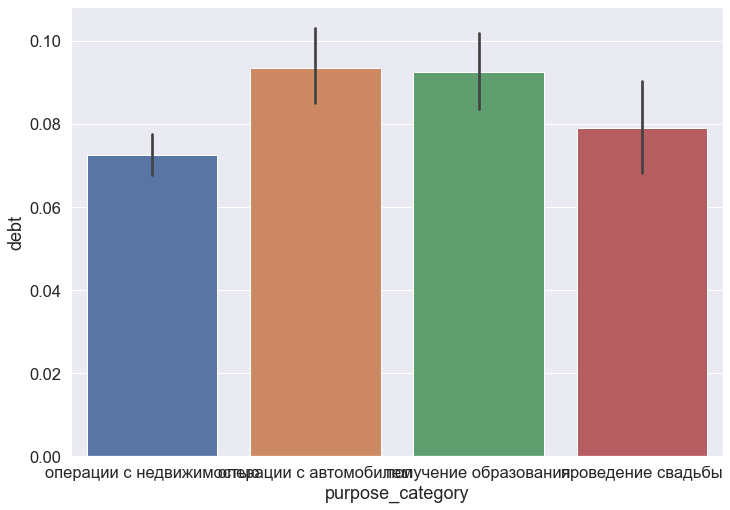

In [104]:
sb.barplot(x=(data['purpose_category']), y=(data['debt'])) # Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** Люди, берущие заем на недвижимость и свадьбу, выплачивают доллг более охотно, чем автолюбители и студенты.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Все верно
</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пример: Пропуски в total_income обусловлены либо отсутствием заработка, как у пенсионеров, либо сознательным сокрытием данных, как у госслужащих. 

В целом, данные могли быть заполнены неаккуратно, если был перенос вручную с бумаги на электронный носитель. Однако, учитывая, что потерянные данные о количестве трудовых дней и о количестве выплат совпадают, делаем вывод, что эти колонки не заполнялись сознательно. 

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Действительно, клиенты могли не предоставить данные. Еще, например, мы могли потерять данные при выгрузке из-за технической ошибки.
</div>

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

<div class="alert alert-info">  
    *Ответ:* чтобы не сокращать размер выборки, лучше данные заполнить. Разброс в оплате труда в отдельных категориях работы может быть разным. Чтобы не терять качество данных, берем медианное значение – делящее группу на две равные части. 

Мода – наиболее часто встречающийся признак. 
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
>  медианное значение – наиболее частый размер оплаты труда для данной категории
    
Подскажи, пожалуйста, что значит частый? А мода тогда что такое (в контексте статистики)?
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Все верно

</div>

### Шаг 4: общий вывод.

Да, семейное положение и количество детей клиента влияют на вероятность выплаты в срок. К очень бедным, очень богатым, холостякам и людям с детьми лучше относиться осторожнее – они значительно реже выплачивают долги вовремя. 

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Здорово, что составил портрет "плохого" клиента!
    
Ответ на основной вопрос исследования стоит давать более развернуто (например, не "семейное положение ... влияют на вероятность", а "с появлением детей увеличивается вероятность задолженности"). Мы ведь хотим, чтобы из вывода можно было понять основные результаты проекта. Еще сюда можно добавить краткое описание работы, отметить интересные особенности.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Спасибо за твою работу! Здорово, что использовал графики!

Осталось немного доработать проект:

- дополнить анализ зависимости задолженности от уровня дохода
- прокомментировать использование медианы для обработки пропусков
 
Задавай вопросы к моим комментариям, если есть. Жду твои исправления:)

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2 ✔️</b>

Спасибо, что учел мои комментарии. Надеюсь, эта работа была полезна для тебя. Я принимаю проект и желаю удачи в прохождении курса!

</div>